In [ ]:
# install kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# download kaggle.json file from kaggle account and upload it
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file {name}'.format(name=fn))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file kaggle.json


In [ ]:
# checking kaggle version
!kaggle --version

Kaggle API 1.5.12


In [ ]:
# make sure that kaggle.json is already on .kaggle folder
!ls /root/.kaggle

kaggle.json


In [ ]:
# copy api command from dataset
!kaggle datasets download -d anefiamutiaraatha/dataset-tanaman-herbal

100% 3.34G/3.35G [00:55<00:00, 73.0MB/s]
100% 3.35G/3.35G [00:55<00:00, 64.4MB/s]


In [ ]:
# extract zip file dataset
!unzip dataset-tanaman-herbal.zip

Archive:  dataset-tanaman-herbal.zip
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (100).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (81).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (82).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (83).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (84).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (85).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (86).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (87).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (88).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (89).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (90).JPG  
  inf

In [ ]:
# import libraries needed
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras_preprocessing import image 
from keras.layers import Dense, GlobalAvgPool2D

In [ ]:
# define the training and validation directory
trainDir = "/content/DATASET TANAMAN HERBAL/Data Training"
validationDir = "/content/DATASET TANAMAN HERBAL/Data Testing"

In [ ]:
# checking amount of data in each label
print("Jambu biji: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Jambu Biji")))
print("Kari: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Kari"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Kari")))
print("Kemangi: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Kemangi"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Kemangi")))
print("Kunyit: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Kunyit"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Kunyit")))
print("Mint: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Mint"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Mint")))
print("Pepaya: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Pepaya"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Pepaya")))
print("Sirih: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Sirih"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Sirih")))
print("Sirsak: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Sirsak"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Sirsak")))
print("Lidah Buaya: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Lidah Buaya"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Lidah Buaya")))
print("Teh Hijau: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Teh Hijau"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Teh Hijau")))

Jambu biji:  100
Kari:  100
Kemangi:  100
Kunyit:  100
Mint:  100
Pepaya:  100
Sirih:  100
Sirsak:  100
Lidah Buaya:  100
Teh Hijau:  100


In [ ]:
# increase the amount of data with augmentation and to decrease overfitting when training model
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   rotation_range=90,
                                   horizontal_flip = True,
                                   vertical_flip = True)
train_generator = train_datagen.flow_from_directory(directory=trainDir,
                                                    batch_size=64, 
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    color_mode="rgb",
                                                    shuffle=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(directory=validationDir,
                                                              batch_size=64, 
                                                              class_mode="categorical",
                                                              target_size=(224, 224),               
                                                              color_mode="rgb")

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [ ]:
# show the labels from dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    trainDir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True)

class_names = train_dataset.class_names
print(class_names)

Found 800 files belonging to 10 classes.


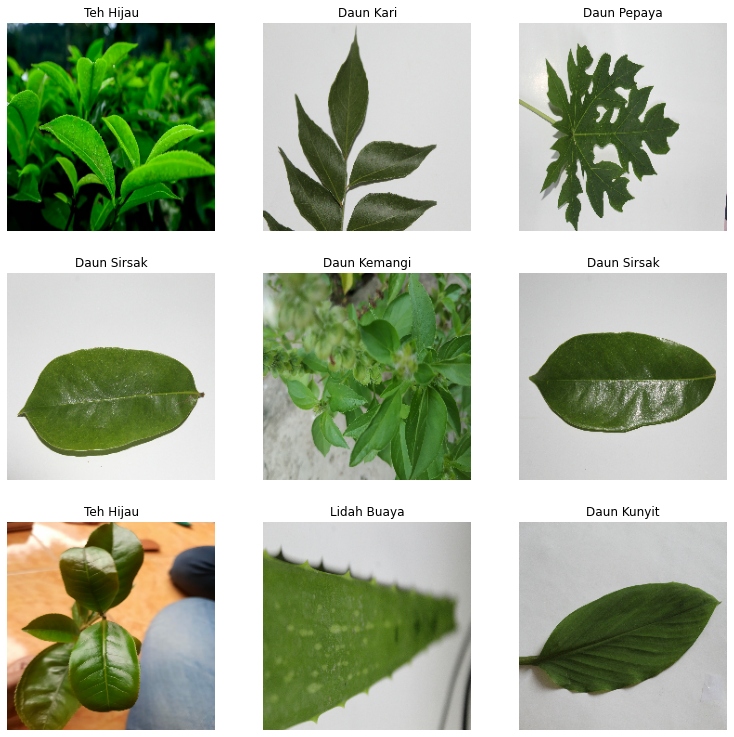

In [ ]:
# show some image examples from dataset
plt.figure(figsize=(13,13))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# define the transfer learning model with InceptionV3 CNN architecture
base_model = InceptionV3(input_shape=(224,224,3),
                         include_top=False,
                         weights='imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# unfreeze a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model
base_model.trainable = False

In [ ]:
# fine tuning to improve forecasting accuracy
fine_tune = 50

# freeze the model to prevents the weights in a given layer from being updated during training
for layer in base_model.layers[:fine_tune]:
  layer.trainable = False

In [ ]:
# define the sequential model to unite base_model with GlobalAveragePooling2D and Dense layer
model = tf.keras.Sequential([base_model,
                             keras.layers.GlobalAveragePooling2D(),
                             keras.layers.Dense(10, activation='softmax')])

In [ ]:
# compile the model before training using categorical crossentropy loss function(for multiple classes)
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# define callback function to stop the training when reach the desired accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
# call callback function and train the model with 30 epochs
callbacks = myCallback()
history = model.fit(train_generator, 
                    epochs=30,
                    validation_data=validation_generator,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/30
13/13 [==============================] - 209s 16s/step - loss: 2.4015 - accuracy: 0.1825 - val_loss: 2.0915 - val_accuracy: 0.2950
Epoch 2/30
13/13 [==============================] - 190s 15s/step - loss: 1.9233 - accuracy: 0.4100 - val_loss: 1.7131 - val_accuracy: 0.4800
Epoch 3/30
13/13 [==============================] - 189s 15s/step - loss: 1.4865 - accuracy: 0.6112 - val_loss: 1.4098 - val_accuracy: 0.6800
Epoch 4/30
13/13 [==============================] - 189s 15s/step - loss: 1.1461 - accuracy: 0.7925 - val_loss: 1.1744 - val_accuracy: 0.7700
Epoch 5/30
13/13 [==============================] - 190s 15s/step - loss: 0.8976 - accuracy: 0.8712 - val_loss: 0.9935 - val_accuracy: 0.8100
Epoch 6/30
13/13 [==============================] - 190s 15s/step - loss: 0.7207 - accuracy: 0.9000 - val_loss: 0.8614 - val_accuracy: 0.8350
Epoch 7/30
13/13 [==============================] - 190s 15s/step - loss: 0.5842 - accuracy: 0.9212 - val_loss: 0.7658 - val_accuracy: 0.8500
Epoch 

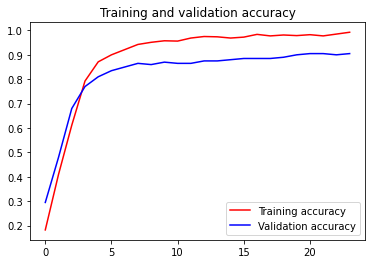

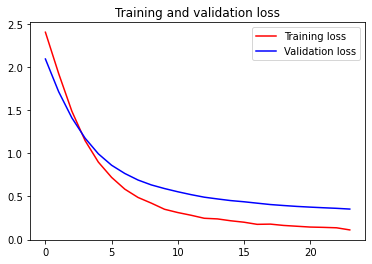

In [ ]:
# show the accuracy and loss graphs from train and validation generator
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# evaluate the validation generator
loss = model.evaluate(validation_generator, steps=10)

 4/10 [===========>..................] - ETA: 41s - loss: 0.3536 - accuracy: 0.9050 WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10 batches). You may need to use the repeat() function when building your dataset.


10/10 [==============================] - 30s 2s/step - loss: 0.3536 - accuracy: 0.9050


Saving daun kemangi (14).jpg to daun kemangi (14).jpg


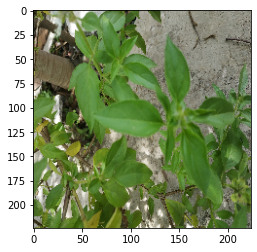

Daun Jambu Biji: 0.60%
Daun Kari: 0.57%
Daun Kemangi: 72.03%
Daun Kunyit: 2.54%
Daun Mint: 2.42%
Daun Pepaya: 2.13%
Daun Sirih: 0.39%
Daun Sirsak: 0.60%
Lidah Buaya: 1.01%
Teh Hijau: 17.71%


In [ ]:
# upload images to predict their accuracy
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

In [ ]:
# convert the model to tflite
converter = tf.lite.TFLiteConverter.from_saved_model("/content/")
tflite_model = converter.convert()

In [ ]:
# download the tflite file to local
tflite_model_file = pathlib.Path("/content/paranmo_transferlearning_model.tflite")
tflite_model_file.write_bytes(tflite_model)